# 8-queens


In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

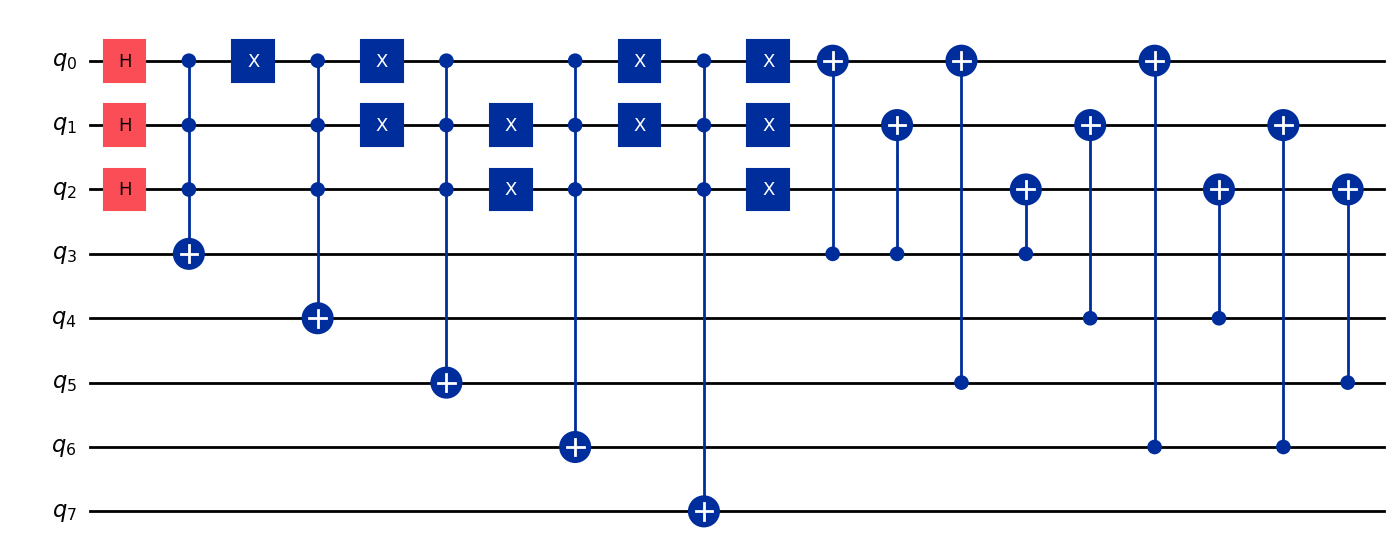

In [2]:
rc = QuantumCircuit(8)

# having 3 bits in superposition, 
# cause we need 2pow3 vectors to represent 
# all possible valid row position of queen
rc.h(0)
rc.h(1)
rc.h(2)

hbits = [0, 1, 2]
rc.mcx(hbits, 3)

rc.x(0)

rc.mcx(hbits, 4)

rc.x(0)
rc.x(1)

rc.mcx(hbits, 5)

rc.x(1)
rc.x(2)

rc.mcx(hbits, 6)

rc.x(0)
rc.x(1)

rc.mcx(hbits, 7)

rc.x(0)
rc.x(1)
rc.x(2)

rc.cx(3, 0)
rc.cx(3, 1)
rc.cx(3, 2)
# rc.barrier()

rc.cx(4, 1)
rc.cx(4, 2)
# rc.barrier()

rc.cx(5, 0)
rc.cx(5, 2)
# rc.barrier()

rc.cx(6, 0)
rc.cx(6, 1)

row = rc.to_instruction()

rc.draw(output="mpl")

In [3]:
# simulator = AerSimulator(method="statevector", device="GPU")

# rc.save_statevector()

# result = simulator.run(rc).result()
# sv = result.get_statevector()
# counts = result.get_counts(rc)
# for key, value in counts.items():
#     print(key, ': ', value)

In [4]:
n = 8
total_qubits = (n*n)+(n-1)+(n*(n-1)/2)

qc = QuantumCircuit(total_qubits)
# 8x8 64 qubits representing 64 position in the board
# built with row gate(rgate), so each row has only one qubit excited (repesenting queen)
for i in range(0, n*n, n):
    qc.append(row, [i for i in range(i, i+n)])

qc = qc.decompose()

In [5]:
# n-1(here, 7) ancillas for column check
for i in range(n*n, (n*n)+n-1):
    qc.h(i)

for i in range(0, n*n, n):
    count = i
    for j in range(n*n, (n*n)+n-1):
        qc.cz(j, count)
        count += 1
    
for i in range(n*n, (n*n)+n-1):
    qc.h(i)
# qc.barrier()

In [6]:
# n(n-1)/2 (here, 6) ancillas for diagonal check
for i in range((n*n)+n-1, 99):
    qc.x(i)
# qc.draw(output='text')

In [7]:
current = (n*n) + n -1
for i in range(0, n):
    for j in range(0, n):
        # right diagonal
        r,c = i+1, j+1
        while r<8 and c<8:
            qc.ccx((i*n)+j,(r*n)+c, current+r-1)
            # print((i*n)+j,(r*n)+c, current+r-1)
            r+=1
            c+=1
        #left diagonal
        r, c = i+1, j-1
        while r<8 and c>=0:
            qc.ccx((i*n)+j,(r*n)+c, current+r-1)
            # print((i*n)+j,(r*n)+c, current+r-1)
            r+=1
            c-=1
        # qc.barrier()
    current += 7-i-1

qc.measure_all()

In [8]:
qc.draw(output='text', filename="8queens_circuit.png")

┌───┐     ┌───┐     ┌───┐               ┌───┐     ┌───┐┌───┐     ┌───┐»
    q_0: ┤ H ├──■──┤ X ├──■──┤ X ├──■─────────■──┤ X ├──■──┤ X ├┤ X ├─────┤ X ├»
         ├───┤  │  └───┘  │  ├───┤  │  ┌───┐  │  ├───┤  │  ├───┤└─┬─┘┌───┐└─┬─┘»
    q_1: ┤ H ├──■─────────■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──┼──┤ X ├──┼──»
         ├───┤  │         │  └───┘  │  ├───┤  │  └───┘  │  ├───┤  │  └─┬─┘  │  »
    q_2: ┤ H ├──■─────────■─────────■──┤ X ├──■─────────■──┤ X ├──┼────┼────┼──»
         └───┘┌─┴─┐       │         │  └───┘  │         │  └───┘  │    │    │  »
    q_3: ─────┤ X ├───────┼─────────┼─────────┼─────────┼─────────■────■────┼──»
              └───┘     ┌─┴─┐       │         │         │                   │  »
    q_4: ───────────────┤ X ├───────┼─────────┼─────────┼───────────────────┼──»
                        └───┘     ┌─┴─┐       │         │                   │  »
    q_5: ─────────────────────────┤ X ├───────┼─────────┼───────────────────■──»
                                  └───┘     ┌─┴─┐       │                      »
    q_6: ───────────────────────────────────┤ X ├───────┼──────────────────────»
                                            └───┘     ┌─┴─┐                    »
    q_7: ─────────────────────────────────────────────┤ X ├────────────────────»
         ┌───┐     ┌───┐     ┌───┐               ┌───┐└───┘┌───┐┌───┐     ┌───┐»
    q_8: ┤ H ├──■──┤ X ├──■──┤ X ├──■─────────■──┤ X ├──■──┤ X ├┤ X ├─────┤ X ├»
         ├───┤  │  └───┘  │  ├───┤  │  ┌───┐  │  ├───┤  │  ├───┤└─┬─┘┌───┐└─┬─┘»
    q_9: ┤ H ├──■─────────■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──┼──┤ X ├──┼──»
         ├───┤  │         │  └───┘  │  ├───┤  │  └───┘  │  ├───┤  │  └─┬─┘  │  »
   q_10: ┤ H ├──■─────────■─────────■──┤ X ├──■─────────■──┤ X ├──┼────┼────┼──»
         └───┘┌─┴─┐       │         │  └───┘  │         │  └───┘  │    │    │  »
   q_11: ─────┤ X ├───────┼─────────┼─────────┼─────────┼─────────■────■────┼──»
              └───┘     ┌─┴─┐       │         │         │                   │  »
   q_12: ───────────────┤ X ├───────┼─────────┼─────────┼───────────────────┼──»
                        └───┘     ┌─┴─┐       │         │                   │  »
   q_13: ─────────────────────────┤ X ├───────┼─────────┼───────────────────■──»
                                  └───┘     ┌─┴─┐       │                      »
   q_14: ───────────────────────────────────┤ X ├───────┼──────────────────────»
                                            └───┘     ┌─┴─┐                    »
   q_15: ─────────────────────────────────────────────┤ X ├────────────────────»
         ┌───┐     ┌───┐     ┌───┐               ┌───┐└───┘┌───┐┌───┐     ┌───┐»
   q_16: ┤ H ├──■──┤ X ├──■──┤ X ├──■─────────■──┤ X ├──■──┤ X ├┤ X ├─────┤ X ├»
         ├───┤  │  └───┘  │  ├───┤  │  ┌───┐  │  ├───┤  │  ├───┤└─┬─┘┌───┐└─┬─┘»
   q_17: ┤ H ├──■─────────■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──┼──┤ X ├──┼──»
         ├───┤  │         │  └───┘  │  ├───┤  │  └───┘  │  ├───┤  │  └─┬─┘  │  »
   q_18: ┤ H ├──■─────────■─────────■──┤ X ├──■─────────■──┤ X ├──┼────┼────┼──»
         └───┘┌─┴─┐       │         │  └───┘  │         │  └───┘  │    │    │  »
   q_19: ─────┤ X ├───────┼─────────┼─────────┼─────────┼─────────■────■────┼──»
              └───┘     ┌─┴─┐       │         │         │                   │  »
   q_20: ───────────────┤ X ├───────┼─────────┼─────────┼───────────────────┼──»
                        └───┘     ┌─┴─┐       │         │                   │  »
   q_21: ─────────────────────────┤ X ├───────┼─────────┼───────────────────■──»
                                  └───┘     ┌─┴─┐       │                      »
   q_22: ───────────────────────────────────┤ X ├───────┼──────────────────────»
                                            └───┘     ┌─┴─┐                    »
   q_23: ─────────────────────────────────────────────┤ X ├────────────────────»
         ┌───┐     ┌───┐     ┌───┐               ┌───┐└───┘┌───┐┌───┐     ┌───┐»
   q_24: ┤ H ├──■──┤ X ├──■──┤ X ├──■───

In [9]:
# Simulator
simulator = AerSimulator(method="statevector", device="GPU")
# simulator = Aer.get_backend('statevector_simulator')

qc.save_statevector()

# Execution on simulator
result = simulator.run(qc, shots=1024).result()

#sv = result.get_statevector(qc)

# counts = result.get_counts(qc)
# print(len(counts))


Simulation failed and returned the following error message:
ERROR:  [Experiment 0] a circuit requires more memory than max_memory_mb.


In [10]:
# pretty print
def position(key):
    for i in range(0, 64):
        print('q' if key[98-i] == '1' else '.', end=' ')
        if (i+1)%8 == 0:
            print()

In [11]:
# filter out the output, all ancillary bits should be 1
import re
regex = re.compile(r'1{35}[01]+')

for key, value in counts.items():
    if regex.match(key):
        position(key)
        print("count:",value, '\n')

NameError: name 'counts' is not defined